In [1]:
#Paquetes
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Paquetes de3 visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Analizador, funciona por medio de una comparación con una base de datos de comentarios de películas y usando el Naive Bayesian para el modelo
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Ejemplo de análisis con textBlob, descomentar la frase que se quiera ver como ejemplo
#TextBlob("This video is absolutely amazing!").sentiment
#TextBlob("I've seen better things, please get good").sentiment
#TextBlob("The cat in the video is white").sentiment
#TextBlob("Is the worst video ever").sentiment

In [ ]:
#Importar la base de comentarios de youtube
data = comm = pd.read_csv('/UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [ ]:
data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
data.shape

(691400, 4)

In [ ]:
comm = data.sample(2000)
comm.shape

(2000, 4)

In [ ]:
#Calcular la polaridad de los comentarios y guardarla en la lista "pol"
pol=[]
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [ ]:
#Agregar la polaridad como columna en la base de datos
comm['pol']=pol

In [ ]:
#Convertir los datos de polaridad de continuos a categoricos
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

In [ ]:
#Muestra comentarios positivos
df_positive = comm[comm.pol==1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
674942,jc1_s2c32zs,"Wow,that mustache is Amazing!!!\n\n\n\n\nNot being sarcastic",0,0,1.0
165368,efJ1xZJDZlI,White Lives Matters! Lmao!,0,0,1.0
281739,lfPvOEN5vaA,LOL The woman was obviously over reacting and purposefully causing a scene. Who could defend this woman??? Seriously!,0,0,1.0
310073,5qkgFES0r-U,your heart is so big my love,0,0,1.0
380301,tmGMd2bqh6o,brilliant!,0,0,1.0
517031,2qiBTkVRp1U,I'm dying because turn the skirt red and it is exactly what I wore to prom. Haha.,0,0,1.0
142530,Eef-1HLKgoQ,"Please say, The Room is an ABSOLUTE masterpiece. Right up there with Citizen Kane. Should have won best Picture..",0,0,1.0
506789,iGHDJ2_hsKE,"Great video ad, I love being outdoors, nothing better!",0,0,1.0
168303,JgYfZAjOgEM,You helped me come out to my mom love you tyty,0,0,1.0
342901,GNTtR6ZpUOo,Dang I asked this months ago! Glad you finally did it!,0,0,1.0


In [ ]:
#Muestra comentarios negativos
df_positive = comm[comm.pol==-1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
550577,r9-DM9uBtVI,so does this mean Superman is coming back or nah?,0,0,-1.0
588162,Hlt3rA-oDao,I know SNL has a bad track record with turning sketches into movies but I want Kellywise in the big screen. Maybe just a cameo in It Chapter 2?,0,0,-1.0
20248,unIkqhB2nA0,Wtf why you fucktards are blowing this way out of proportion. Make a video which teaches not what stuffs biased exaggerated opinions one's throat. It was not a finished product.,0,0,-1.0
162270,AEaKrq3SpW8,OSI layers make me hurt :(,1,0,-1.0
211959,ekaeJN9Sgu0,"YAYY-luv them-so funny...i loved Thursdays ,used to get off work right before 8:30 pm before will & grace started & had a couple of beers & laughs followed by E.R.-man those were the thursdays-wai...",2,0,-1.0
70710,gDFZS0BVsBY,Looper's thumbnail game is getting too stronk...,0,0,-1.0
359120,_cu4FHyCcT8,"Instructions not clear, ended up with a hole in my penis.",0,0,-1.0
380352,KPqtlI3aJIE,OMG. I didn't notice this before. Why are the black people on one side and the white people on the other? Segregation in a single music video...disgraceful.,0,0,-1.0
212256,nW-aml4r7Gc,Damm that girl can fucking sing!!!,0,0,-1.0
224326,aiXo6WyhCJs,*i wake up and i have all these piles of dead cats in the floor*,3,0,-1.0


In [ ]:
#Muestra comentarios neutrales
df_positive = comm[comm.pol==0]
df_positive.head(10)


,video_id,comment_text,likes,replies,pol
617531,FvcNr_5uWgY,Touched,0,0,0.0
484697,tfHCtgyT-oQ,2:15 MERCHFACE,0,0,0.0
681729,7_GaeAoLMWY,She sounds like Keisha Coleslaw 🤢🤢,1,0,0.0
305128,xffuHHjO_Us,Yesss,0,0,0.0
632090,hkA2a4_tNOs,Bruh this nigga a rat. But the movie is trash doe.,0,0,0.0
184814,1QWLyi03twg,If anyone actually pays money to see this train wreck they should committed because there is no hope for them.,0,0,0.0
136863,rCo4gIZu0DY,not a fan of the intro song tbh,0,0,0.0
190038,iL_-GwbEP4g,anybody else getting kaiser chiefs vibes?,0,0,0.0
455713,PLDJQondOQE,This gadget is called boom gadget.,0,0,0.0
628893,xTyTQgb-y-A,Ahhhhhh!!! #29 on TRENDING,0,0,0.0


 1.0    894
 0.0    794
-1.0    312
Name: pol, dtype: int64

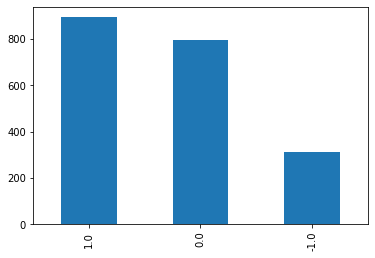

In [ ]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()